<a href="https://colab.research.google.com/github/annaklaracss/data_science-/blob/main/Data_Science_testando_hip%C3%B3teses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# carregando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Leitura dos dados

# idade de aponsentadoria
dados_idade_aposentadoria = pd.read_csv("/content/dados_idade_aposentadoria.csv")

# Tempo de Vida de uma Lâmpada
dados_vida_lampada = pd.read_csv("/content/dados_vida_lampada.csv")

# Altura dos funcionarios
dados_alturas = pd.read_csv("/content/dados_alturas.csv")

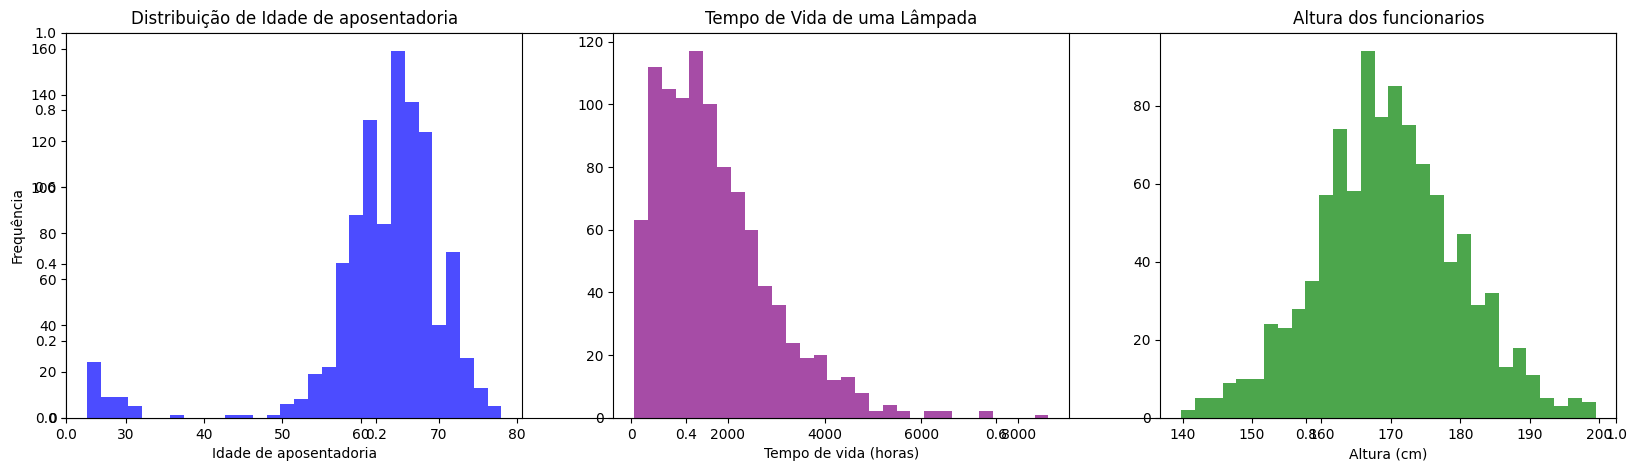

In [11]:
plt.subplots(figsize=(20,5))
plt.subplot(131)
plt.title('Distribuição de Idade de aposentadoria')
plt.xlabel('Idade de aposentadoria')
plt.ylabel('Frequência')
plt.hist(dados_idade_aposentadoria, bins=30 , alpha=0.7, color= 'blue')


plt.subplot(132)
plt.title('Tempo de Vida de uma Lâmpada')
plt.xlabel('Tempo de vida (horas)')
plt.hist(dados_vida_lampada, bins=30 , alpha=0.7, color= 'purple')

plt.subplot(133)
plt.title('Altura dos funcionarios')
plt.xlabel('Altura (cm)')
plt.hist(dados_alturas, bins=30 , alpha=0.7, color= 'green')


plt.show()




O código plt.subplot(131) é usado no Matplotlib para criar uma grade de subplots (múltiplos gráficos) dentro de uma única figura.

Vamos quebrar o significado dos números:
1: Indica o número de linhas na grade de subplots. Neste caso, há 1 linha.
3: Indica o número de colunas na grade de subplots. Neste caso, há 3 colunas.
1: Indica o índice do subplot atual. Neste caso, é o primeiro subplot na grade. Os índices começam em 1 e aumentam da esquerda para a direita e de cima para baixo.

Então, plt.subplot(131) cria uma grade de 1 linha por 3 colunas e ativa o primeiro subplot para que você possa plotar nele. Se você quisesse plotar no segundo subplot da mesma grade, usaria plt.subplot(132), e assim por diante.



In [13]:
#reamostragem

#tamanho da amostra
n=100

#quantidade de amostras
qnt=10000

#função de reamostragem e calculo de médias
def reamostragem_medias(dados, coluna,n, qnt):
  medias = [dados[coluna].sample(n, replace = True).mean() for _ in range(qnt)]
  return medias

Reamostragem" (Resampling em inglês) é um termo genérico que se refere a diversas técnicas utilizadas em estatística e aprendizado de máquina para extrair amostras repetidamente de um conjunto de dados existente.

Em resumo, a reamostragem é uma ferramenta poderosa e versátil que permite aos estatísticos e cientistas de dados explorar a variabilidade dos dados, testar hipóteses, validar modelos e lidar com desafios específicos, como o desequilíbrio de classes, de forma mais robusta e eficiente.

In [20]:
dados_idade_aposentadoria.head()#para saber o nome da coluna

,idade
0,66
1,66
2,60
3,61
4,57


In [19]:
dados_vida_lampada.head() #para saber o nome da coluna

,duracao
0,2238.462196
1,404.474833
2,358.025869
3,2193.463611
4,1072.377941


In [18]:
dados_alturas.head() #para saber o nome da coluna

,alturas
0,167.52
1,185.21
2,172.74
3,171.52
4,157.75


In [21]:
#realizando a reamostragem com função

idade= reamostragem_medias(dados_idade_aposentadoria, 'idade', n, qnt)
media_duracao = reamostragem_medias(dados_vida_lampada, 'duracao', n, qnt)
media_altura = reamostragem_medias(dados_alturas, 'alturas', n, qnt)

